## Final results

Now, after the `EXTEVAL-Corrector-research` and the `EXTEVAL-Modified-Corrector-research`, the results from both researches are compared. The results from each reserach were already visualised in their notebooks at the end. This notebook now serves as a comparison between the two results to determine which approach was better and to identify strengths and weakness of both approaches.

These final comparison results will be visualised with a following conclusion on what worked better and should be used for future LLM correctors (such as `GPT-4o`).

### 1. Comparison percentage improvement

Comparison of percentage improvements saved to results/comparison_percentage_improvements.csv.


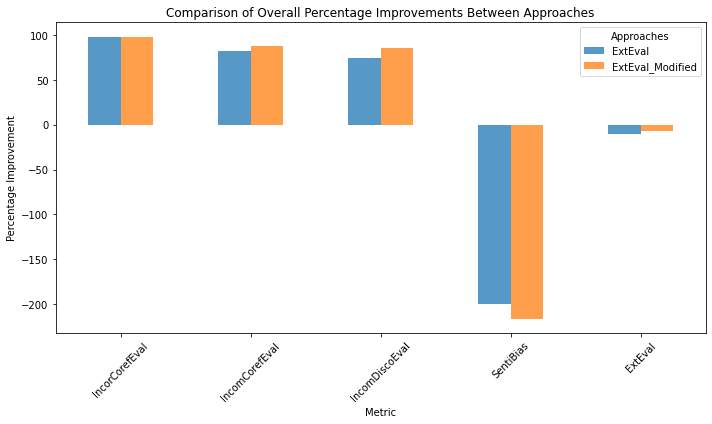

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results from both approaches
file1 = "results/percentage_improvement_comparison.csv"  # Results from exteval corrector
file2 = "results/percentage_improvement_comparison_modified.csv"  # Results from exteval modified corrector

data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

# Extract the relevant "Overall Percentage Improvements"
overall_1 = data1[data1["Object"] == "Overall Average"].filter(like="_percentage_improvement").T
overall_1.columns = ["ExtEval"]
overall_1.index = overall_1.index.str.replace("_percentage_improvement", "")

overall_2 = data2[data2["Object"] == "Overall Average"].filter(like="_percentage_improvement").T
overall_2.columns = ["ExtEval_Modified"]
overall_2.index = overall_2.index.str.replace("_percentage_improvement", "")

# Combine the results for comparison
comparison = pd.concat([overall_1, overall_2], axis=1)

# Calculate differences
comparison["Difference"] = comparison["ExtEval_Modified"] - comparison["ExtEval"]

# Save the comparison table
comparison_file = "results/comparison_percentage_improvements.csv"
comparison.to_csv(comparison_file, index=True)
print(f"Comparison of percentage improvements saved to {comparison_file}.")

# Visualize the results
comparison[["ExtEval", "ExtEval_Modified"]].plot(kind="bar", figsize=(10, 6), alpha=0.75)
plt.title("Comparison of Overall Percentage Improvements Between Approaches")
plt.ylabel("Percentage Improvement")
plt.xlabel("Metric")
plt.xticks(rotation=45)
plt.legend(title="Approaches")
plt.tight_layout()

# Save the comparison plot
plot_file = "results/comparison_percentage_improvements.png"
plt.savefig(plot_file)
plt.show()


### Conclusion comparsion percentage improvement

- IncorCorefEval: Both Approaches showed the same positive effect -> 98.35 % -> nearly perfect
- IncomCorefEval and IncomDiscoEval: The Exteval_Modified_Corrector approachs did a better job in correcting those mistakes, but the Exteval_Corr only did slightly worse.
- SentiBias: Here the first Approach (Exteval_Corrector) got a better results, which is still heavily negative. These results show that our LLM GPT-4o actually worsened the SentiBias.
- ExtEval: Duo to the huge outliners in SentiBias the results here a negative. That is why the mean and median was also calculated to get a better insight into the improvements. However the Exteval_Modified_Corrector archieved a better result here.

### 2. Comparison mean and median improvement

- Why mean? -> incorporates every data points, reflects the total improvement -> provides the average improvement across all data
- Why median? -> robust to outliners -> reflects the typical improvement which is unaffected by extreme results

-> For this case median is more important because it is resistant to outliers (e.g. the strong sentibias results) and it provides the common improvement across the metrics.

Comparison of statistical summaries saved to results/comparison_statistical_summaries.csv.


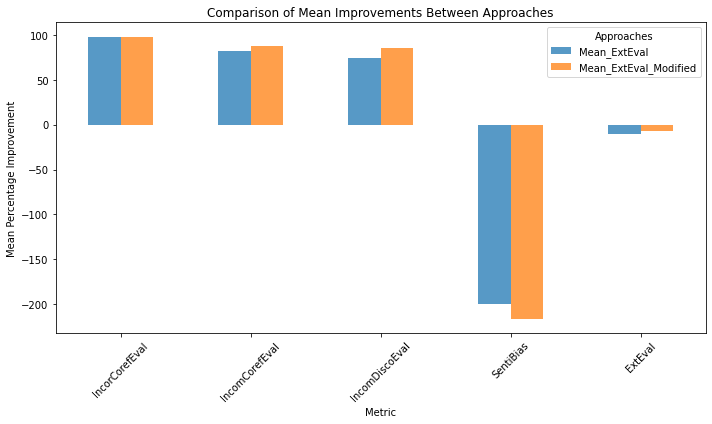

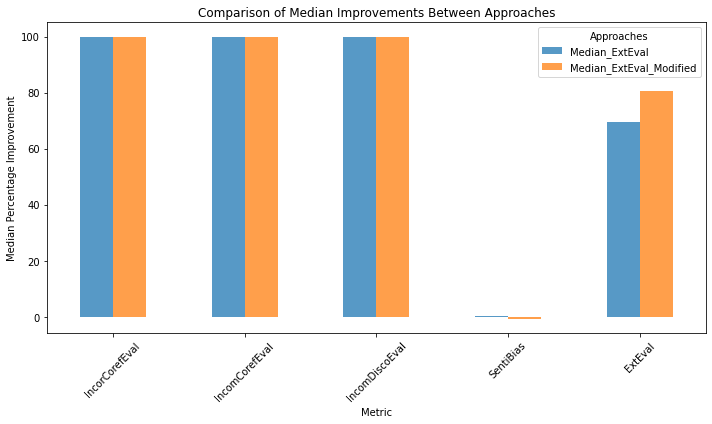

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the statistical results from both approaches
file1 = "results/summary_statistics.csv"  # Results from approach 1
file2 = "results/summary_statistics_modified.csv"  # Results from approach 2

stats1 = pd.read_csv(file1)
stats2 = pd.read_csv(file2)

# Set the "Metric" column as the index
stats1.set_index("Metric", inplace=True)
stats2.set_index("Metric", inplace=True)

# Compare the Mean and Median values
comparison_stats = pd.DataFrame({
    "Mean_ExtEval": stats1["Mean_Percentage_Improvement"],
    "Mean_ExtEval_Modified": stats2["Mean_Percentage_Improvement"],
    "Median_ExtEval": stats1["Median_Percentage_Improvement"],
    "Median_ExtEval_Modified": stats2["Median_Percentage_Improvement"]
})

# Calculate the differences
comparison_stats["Mean_Difference"] = comparison_stats["Mean_ExtEval_Modified"] - comparison_stats["Mean_ExtEval"]
comparison_stats["Median_Difference"] = comparison_stats["Median_ExtEval_Modified"] - comparison_stats["Median_ExtEval"]

# Save the comparison table
comparison_stats_file = "results/comparison_statistical_summaries.csv"
comparison_stats.to_csv(comparison_stats_file, index=True)
print(f"Comparison of statistical summaries saved to {comparison_stats_file}.")

# Visualize the Mean values
comparison_stats[["Mean_ExtEval", "Mean_ExtEval_Modified"]].plot(kind="bar", figsize=(10, 6), alpha=0.75)
plt.title("Comparison of Mean Improvements Between Approaches")
plt.ylabel("Mean Percentage Improvement")
plt.xlabel("Metric")
plt.xticks(rotation=45)
plt.legend(title="Approaches")
plt.tight_layout()

# Save the Mean comparison plot
plot_file_means = "results/comparison_mean_improvements.png"
plt.savefig(plot_file_means)
plt.show()

# Visualize the Median values
comparison_stats[["Median_ExtEval", "Median_ExtEval_Modified"]].plot(kind="bar", figsize=(10, 6), alpha=0.75)
plt.title("Comparison of Median Improvements Between Approaches")
plt.ylabel("Median Percentage Improvement")
plt.xlabel("Metric")
plt.xticks(rotation=45)
plt.legend(title="Approaches")
plt.tight_layout()

# Save the Median comparison plot
plot_file_medians = "results/comparison_median_improvements.png"
plt.savefig(plot_file_medians)
plt.show()


### Conclusion mean and median improvement

#### Mean
- IncorCorefEval: Both Approaches showed the same positive effect -> 100%.
- IncomCorefEval and IncomDiscoEval: The Exteval_Modified_Corrector archieved a better result here than the Exteval_Corrector Approach.
- SentiBias: Here the first Approach (Exteval_Corrector) got a better results, which is still heavily negative. These results show that our LLM GPT-4o actually worsened the SentiBias.
- ExtEval: Duo to the huge outliners in SentiBias the results here a negative. That is why the median was also calculated to actually see the normal improvement without huge outliners. However the Exteval_Modified_Corrector archieved a better result here.


#### Median
- IncorCorefEval, IncomCorefEval and IncomDiscoEval: Both Approaches showed the same positive effect -> 100%.
- SentiBias: Here the first Approach (Exteval_Corrector) still gets a slightly better result, but thanks to median now both improvements are close to 0 -> no huge negative outliners.
- ExtEval: Now the overall ExtEval scores show the real improvement without any outliners. Here the first approach, the Exteval_Corrector, archieved a median of 69.5% and the second approach, the Exteval_Modified_Corrector, archieved a median of 80.5%. This shows us, that both approaches did a got job and the modified version is even better.

### 3. Overall conclusion

Now back to our original research question: `Are large language models, such as GPT-4o, able to automatically rectify detected errors by ExtEval, and produce a more faithful, error-free summary?`

After the modification of ExtEval to provide more information in the scores and the creation of a prompt-mask for GPT-4o the new corrected extractive summaries overall archieved a 80.5% (median result to show the typical improvement) better ExtEval score then the original summaries did.

This means, `yes GPT-4o is able to correct those identified error categories and create a more faithful, error-free summary`.